# Import libraries

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

In [2]:
data = pd.read_csv(r'C:\Users\admin\Downloads\spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.dtypes

label      object
message    object
dtype: object

In [6]:
data.describe(include='all')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Check for missing values

In [7]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 label      0
message    0
dtype: int64


# Label distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = data['label'].value_counts()
print("Label distribution:\n", label_counts)


Label distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


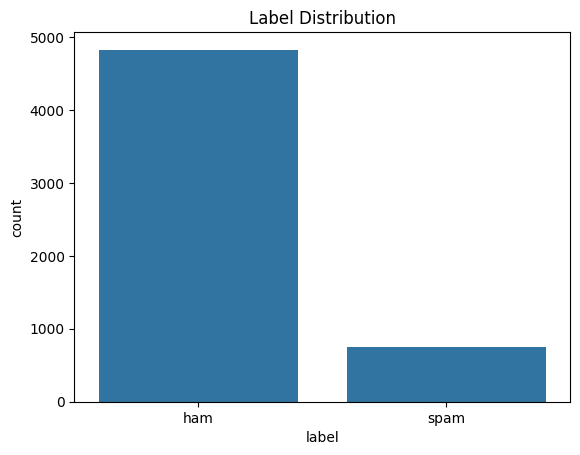

In [9]:
sns.countplot(x='label', data=data)
plt.title('Label Distribution')
plt.show()

# Message length analysis

In [10]:
data['message_length'] = data['message'].apply(len)

# Plot the distribution of message lengths

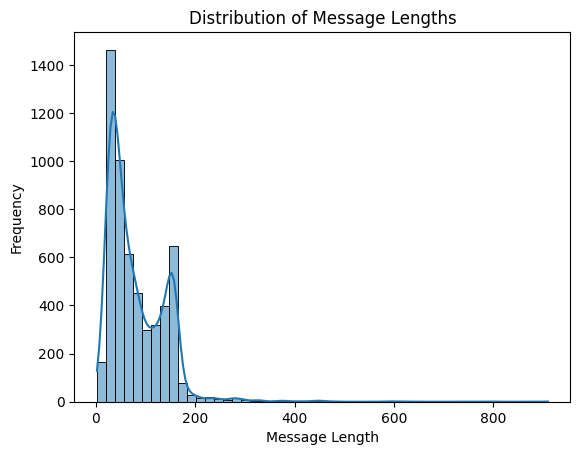

In [11]:
sns.histplot(data['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Boxplot of message lengths by label

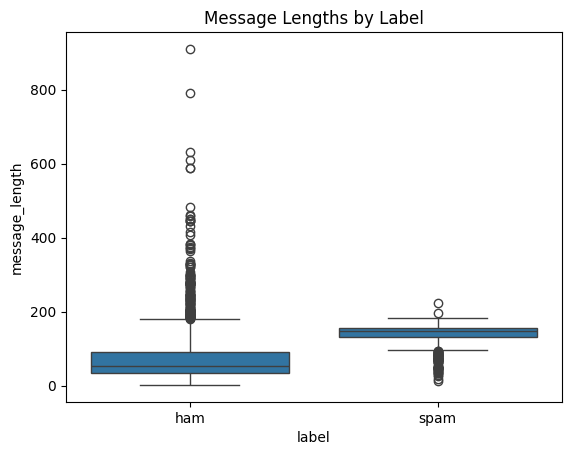

In [12]:
sns.boxplot(x='label', y='message_length', data=data)
plt.title('Message Lengths by Label')
plt.show()

# Word Frequency Analysis

In [13]:
from wordcloud import WordCloud
from collections import Counter
import re

# Convert labels to binary

In [14]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Clean the messages

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

data['cleaned_message'] = data['message'].apply(clean_text)

# Combine all messages into a single string

In [16]:
all_messages = ' '.join(data['cleaned_message'])

# Generate a word cloud

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot the word cloud

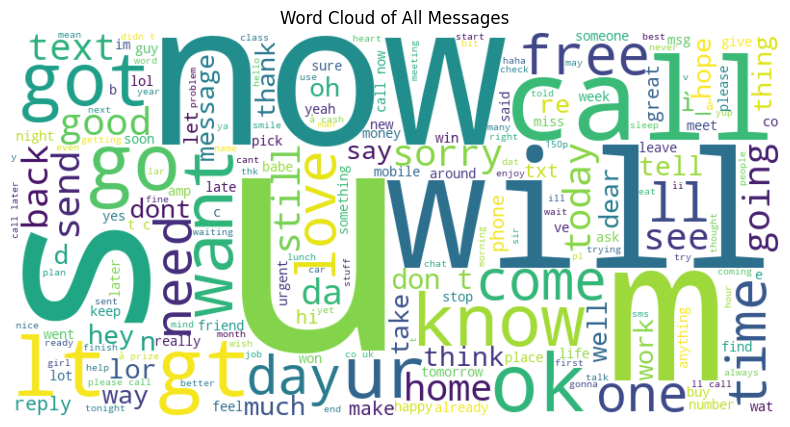

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Messages')
plt.show()

# Top 20 most common words

In [19]:
words = all_messages.split()
word_counts = Counter(words)
top_20_words = word_counts.most_common(20)
print("Top 20 most common words:\n", top_20_words)

Top 20 most common words:
 [('i', 3001), ('to', 2242), ('you', 2240), ('a', 1433), ('the', 1328), ('u', 1192), ('and', 979), ('in', 898), ('is', 890), ('me', 802), ('my', 762), ('it', 744), ('for', 704), ('your', 681), ('of', 620), ('call', 591), ('that', 577), ('have', 575), ('s', 568), ('on', 537)]


# Plot the top 20 most common words

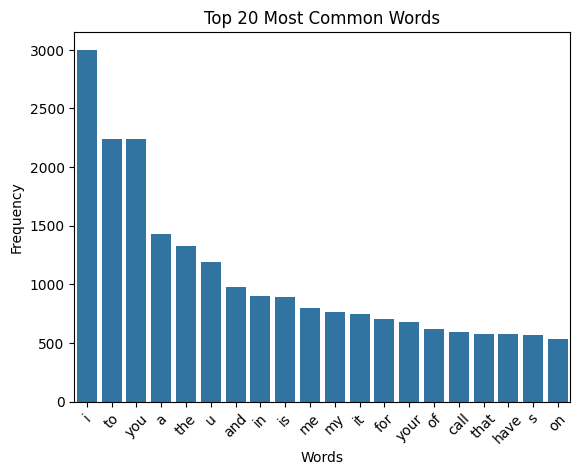

In [20]:
sns.barplot(x=[word[0] for word in top_20_words], y=[word[1] for word in top_20_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Split the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [23]:
print("Missing values in label column:\n", data['label'].isnull().sum())

Missing values in label column:
 0


# Naive Bayes Classifier

In [24]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9668161434977578
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# Logistic Regression Classifier

In [26]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [27]:
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.968609865470852
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# Support Vector Machine Classifier

In [28]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True)

In [29]:
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9829596412556054
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Test Counterfactual Explanation

In [30]:
test_instance0 = X_test.iloc[1] 
print("Original Message:", test_instance0)

test_instance1 = X_test.iloc[1] 
print("Original Message:", test_instance1)


Original Message: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones


# Transform the test instance to TF-IDF 

In [31]:
test_instance_tfidf = tfidf_vectorizer.transform([test_instance])
print("Original Prediction:", svm_model.predict(test_instance_tfidf))

test_instance_tfidf1 = tfidf_vectorizer.transform([test_instance1])
print("Original Prediction:", svm_model.predict(test_instance_tfidf))

Original Prediction: [0]


In [ ]:
import joblib

# Save the SVM model

In [42]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

# Save the TF-IDF vectorizer

In [43]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']